In [148]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc
import random

In [149]:
rc('text', usetex=False)
rc('font', serif ='Times')
rc('font', size=16)
rc('axes', linewidth=0.5)
rc('lines', linewidth=1.15	)
rc('figure', figsize=(8.3,5.2))
rc('grid', c='0.5', ls='--', lw=0.5)

In [150]:
A = 0.1
B = 1.

k = 0.01

M = 84
L = 1000 # the ring length
ds = L/M # The distance between BPMs



In [151]:
SP2 = 48


def read_twiss(filename, header):
    
    twiss = open(filename)  # This file updates every time of madx running

    s, sbpm, beta, betabpm, phasebpm, mu = list(), list(), list(), list(), list(), list()

    for i,line in enumerate(twiss):
        line=line.strip()
        line=line.split()
        if line[1] == 'Q1':
            tuneX = float(line[3])
        if line[1] == 'Q2':
            tuneY = float(line[3])
        if i > header:
            s.append(float(line[2]))
            beta.append(float(line[6]))
            mu.append(2*np.pi*float(line[10]))
            if 'DX1' in line[0]:
                sbpm.append(float(line[2]))
                betabpm.append(float(line[6]))
                phasebpm.append(2*np.pi*float(line[10]))
# what?           dr = float(line[2]) - svar[i-SP2-3]

    twiss.close()
    return tuneX, tuneY, s, sbpm, beta, betabpm, phasebpm, mu

Q1, Q2, svar, sbpm, betamod, betabpm, phasebpm, mu = read_twiss('twiss.txt',SP2)

n_points = 2*len(svar)
h = svar[-1]/n_points # step
s_inter = np.linspace(svar[0], svar[-1], n_points)
beta_inter = np.interp(s_inter, svar, betamod, period = 54.17782237/6.)


print('horizontal tune (from TWISS)  is {}'.format(Q1))
print('vertical tune (from TWISS) is {}'.format(Q1))

horizontal tune (from TWISS)  is 2.42
vertical tune (from TWISS) is 2.42


In [152]:
def sin(x):
    return np.sin(2*np.pi*Q1*x)

def cos(x):
    return np.cos(2*np.pi*Q1*x)


In [153]:
def phase(s_i, s_f, s_var, beta, step):
    tmp =[k*np.sqrt(beta[i])/A*cos(s)/(B-A*np.sqrt(beta[i])*cos(s))*step for i,s in enumerate(s_var) if s_i<=s and s<=s_f]
    return sum(tmp)

def amplitude(s_i, s_f, s_var, beta, step):
    tmp =[k*np.sqrt(beta[i])/B*sin(s)/(B-A*np.sqrt(beta[i])*cos(s))*step for i,s in enumerate(s_var) if s_i<=s and s<=s_f]
    return sum(tmp)

In [156]:

def count_parts(s):
    tmph =0
    tmpa =0
    phs = [0]
    ampl = [0]
    for i in range(1,len(s)):
        tmph += phase(s[i-1], s[i], s_inter,beta_inter, h)
        tmpa += amplitude(s[i-1], s[i], s_inter,beta_inter, h)
        phs.append(tmph)
        ampl.append(tmpa)
    return phs, ampl
        

In [157]:
phs, amp = count_parts(s_inter)

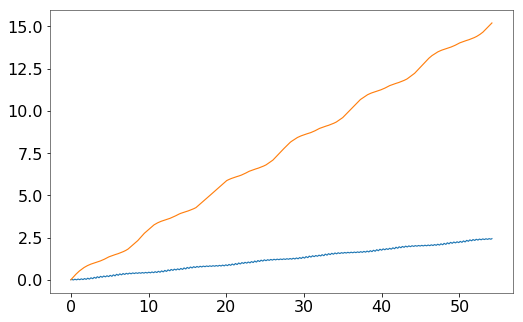

In [158]:
plt.plot(s_inter,phs)
plt.plot(svar, mu)

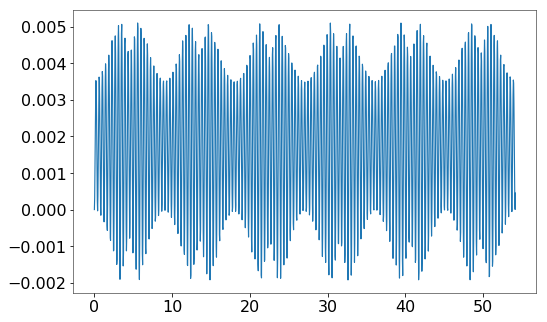

In [159]:
plt.plot(s_inter, amp)